# Import Libs

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import xgboost as xgb
import lightgbm as lgb

In [104]:
df = pd.read_csv(r'C:\Users\Doust\NoteBook\ChurnModel\data\Churn.csv')
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [105]:
# barasi null ha
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<div dir="rtl" style="font-family: Tahoma; font-size: 15px; line-height: 1.8;">

### بررسی اجمالی داده ها


- خوشبختانه داده ها تمیز هستن و تنها چالش داده های غیر بالانس هستن که اکثر دیتاست های چرن این چالش وجود داره که از 
2 طریق قابل حل هست که در ادامه میبینیم.

</div>


In [106]:
df['balance_salary_ratio'] = df['Balance'] / (df['EstimatedSalary'] + 1)  # jologiri az division by zero
df['credit_score_per_age'] = df['CreditScore'] / (df['Age'] + 1)
df['tenure_per_age'] = df['Tenure'] / (df['Age'] + 1)
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_salary_ratio,credit_score_per_age,tenure_per_age
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,14.395349,0.046512
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744670,14.476190,0.023810
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401362,11.674419,0.186047
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,17.475000,0.025000
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587035,19.318182,0.045455
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0.759599,14.333333,0.177778
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0.000000,16.117647,0.137255
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.963961,12.533333,0.133333
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,1.895493,11.133333,0.088889
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1.876621,24.428571,0.071429


# Data Visualization

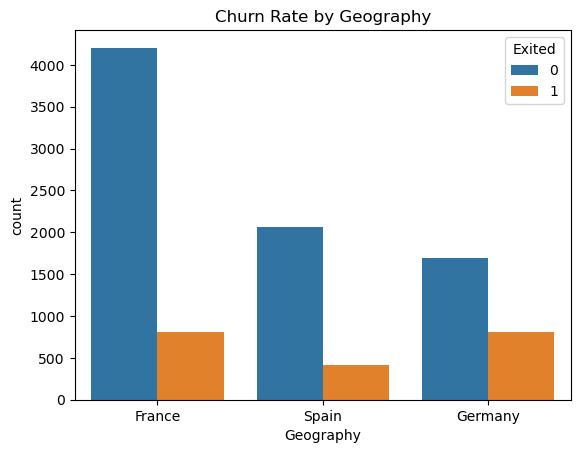

In [107]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn Rate by Geography')
plt.show()

<div dir="rtl" style="font-family: Tahoma; font-size: 15px; line-height: 1.8;">

- با اینکه مشتری ها در کشور فرانسه به مراتب بیشتر از آلمان هستن ولی تعداد خروج مشتری در آلمان بیشتره
</div>

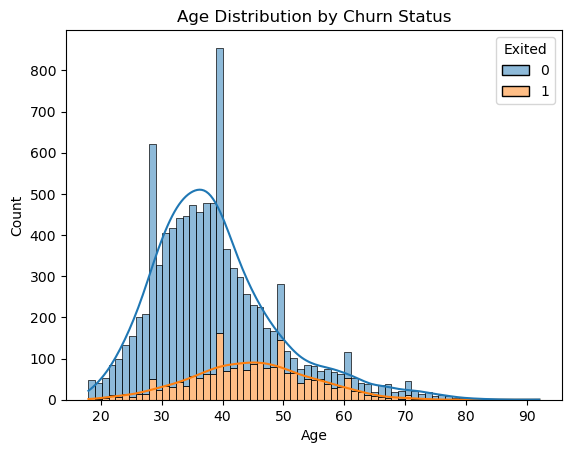

In [108]:
sns.histplot(data=df, x='Age', hue='Exited', kde=True, multiple="stack")
plt.title('Age Distribution by Churn Status')
plt.show()

<div dir="rtl" style="font-family: Tahoma; font-size: 15px; line-height: 1.8;">

- ظاهرا ی چیزی داره مشتری های 40 تا 50 سال رو اذیت میکنه
</div>

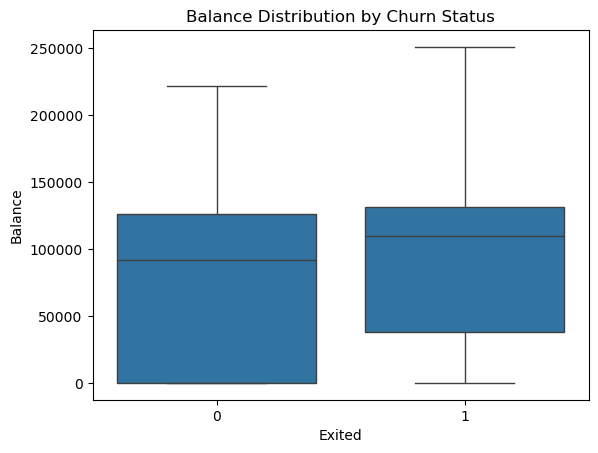

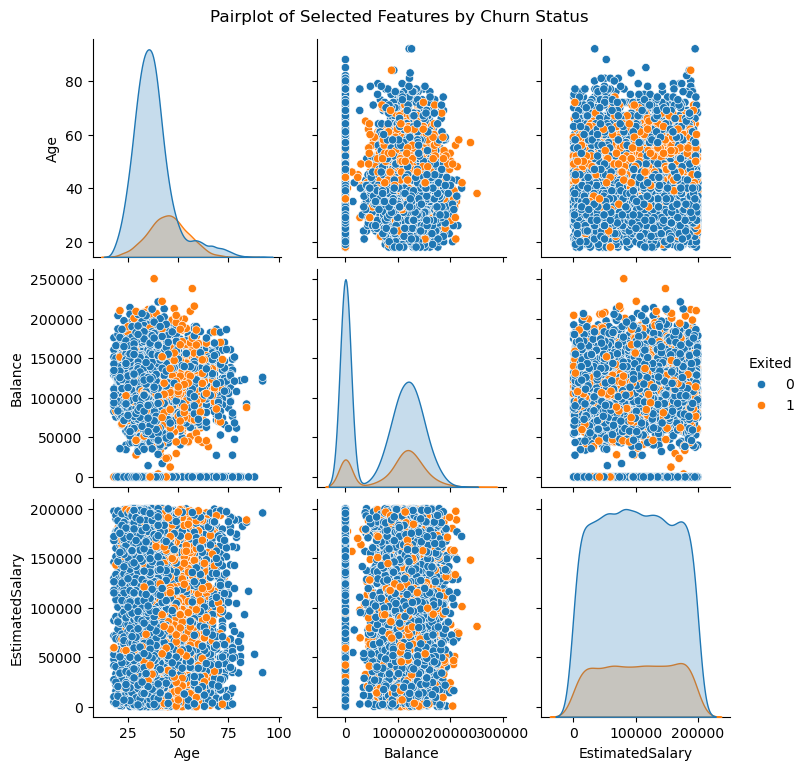

In [109]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.show()
sns.pairplot(df, hue='Exited', vars=['Age', 'Balance', 'EstimatedSalary'])
plt.suptitle('Pairplot of Selected Features by Churn Status', y=1.02)
plt.show()

<div dir="rtl" style="font-family: Tahoma; font-size: 15px; line-height: 1.8;">

- میانه داده ها در نمودار اول نشون میده که مشتریانی خارج شده سرمایه بیشتری نسبت به مشتریان وفادار داشتن که البته باید بررسی کنیم که این عامل به تنهایی تاثیر گذار بوده یا صرفا اثری از سن مشتریانه در حال خروجه که با نمودار بعدی مشخص میشه.
</div>

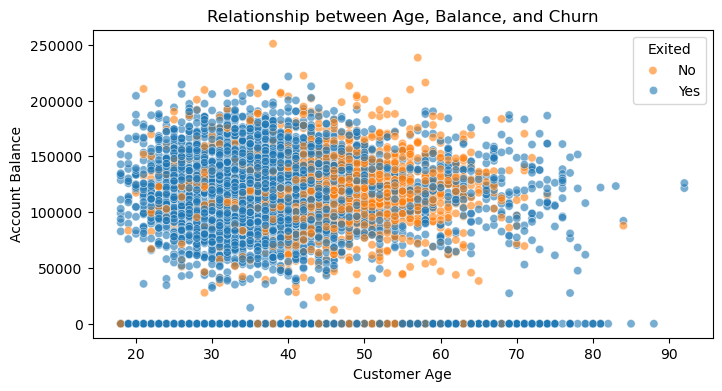

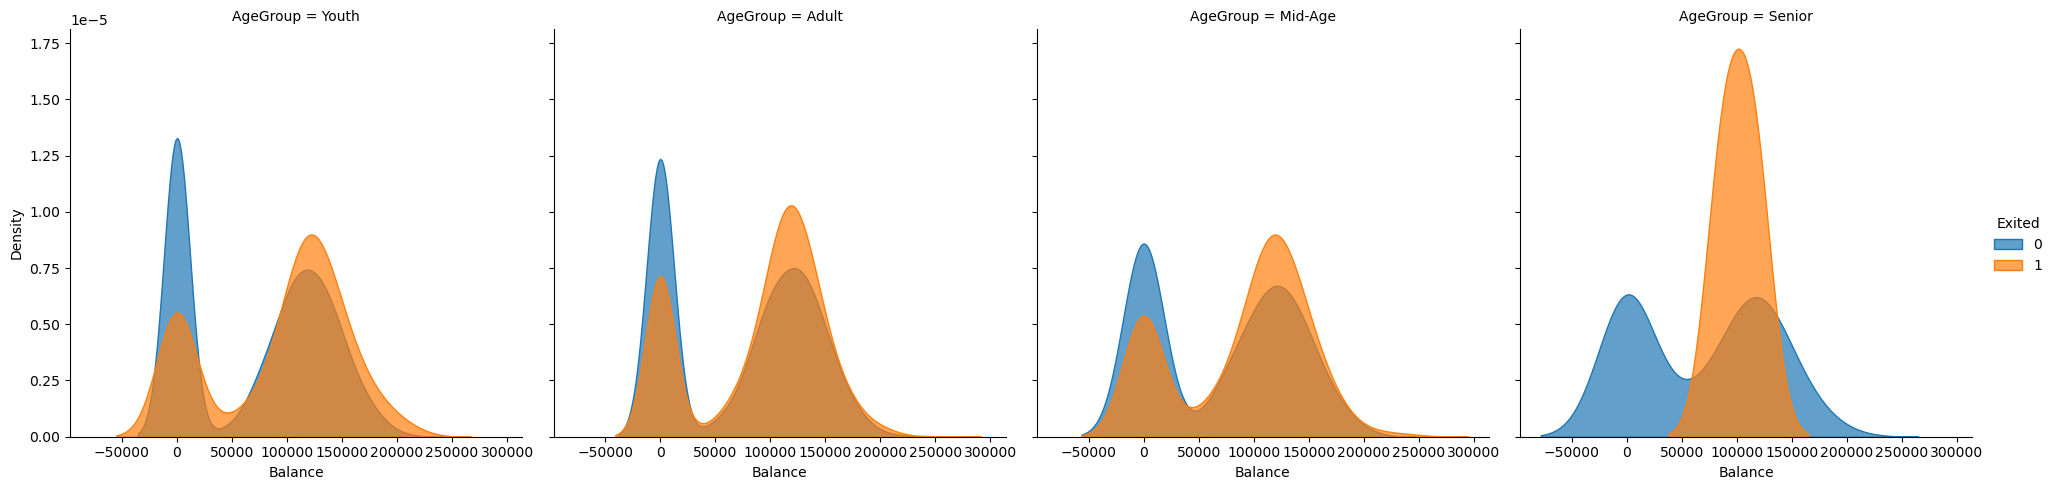

In [110]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df, alpha=0.6)
plt.title('Relationship between Age, Balance, and Churn')
plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

age_groups = pd.cut(df['Age'], bins=4, labels=['Youth', 'Adult', 'Mid-Age', 'Senior'])

g = sns.FacetGrid(df.assign(AgeGroup=age_groups), col='AgeGroup', hue="Exited", height=5, aspect=1)
g.map(sns.kdeplot, "Balance", fill=True, alpha=0.7)
g.add_legend()
plt.show()



<div dir="rtl" style="font-family: Tahoma; font-size: 15px; line-height: 1.8;">

-  این نمودار نشون میده در همه گروه های سنی ریزش در ناحیه 50هزار تا 170 هزار وجود داره که یعنی فارق از عامل سن داره اتفاق میوفته و افرادی که بالانسشون به 130k نزدیک شده در گروه ریسک قرار گرفتن و خارج شدن.
- در هرصورت این اتفاق در گروه سنی مسن به پیک تبدیک شده و یک سیگنال قویه
- اما باید ببینیم این دوتا قله ای که توی داده ها ایجاد شده صرفا الگو گرفته از تراکم خود دیتاست هست یا خیر
</div>

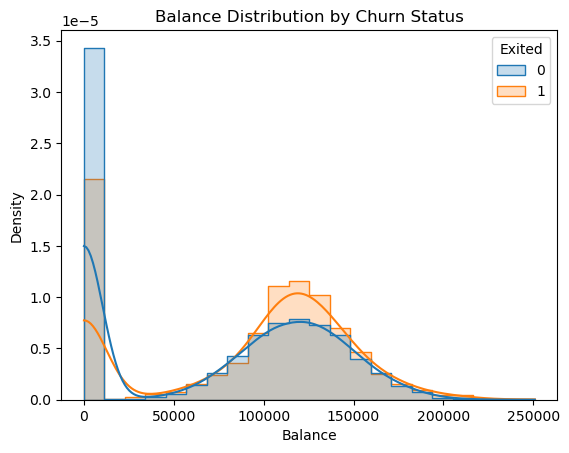

In [111]:
sns.histplot(data=df, x='Balance', hue='Exited', kde=True, element="step", stat="density", common_norm=False)
plt.title('Balance Distribution by Churn Status')
plt.show()

C:\Users\Doust\AppData\Local\Temp\ipykernel_18392\1375546812.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_balance = df.groupby(balance_bins)['Exited'].mean()


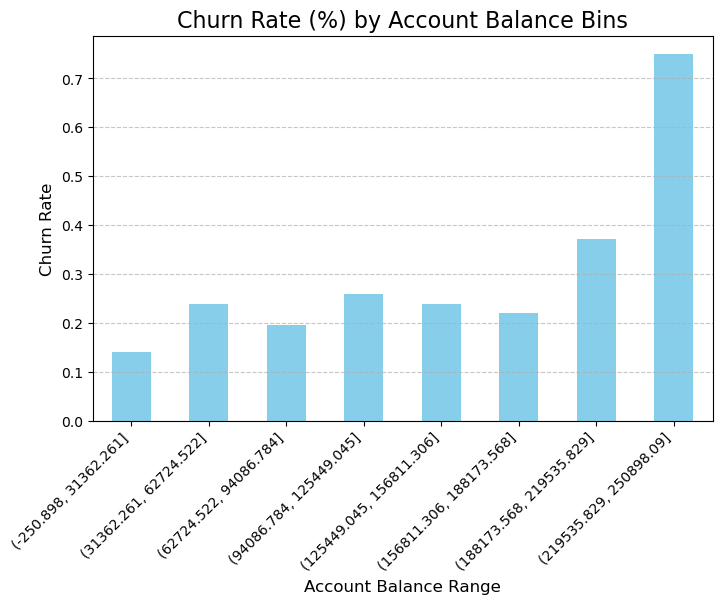

In [112]:
balance_bins = pd.cut(df[(df['Balance'] >= 0)]['Balance'], bins=8)
churn_rate_by_balance = df.groupby(balance_bins)['Exited'].mean()
plt.figure(figsize=(8, 5))
churn_rate_by_balance.plot(kind='bar', color='skyblue')
plt.title('Churn Rate (%) by Account Balance Bins', fontsize=16)
plt.xlabel('Account Balance Range', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [113]:
df.loc[df['Balance'] > 220000, ['Balance', 'Exited']]

,Balance,Exited
2092,250898.09,1
3280,238387.56,1
3588,221532.80,0
8733,222267.63,1


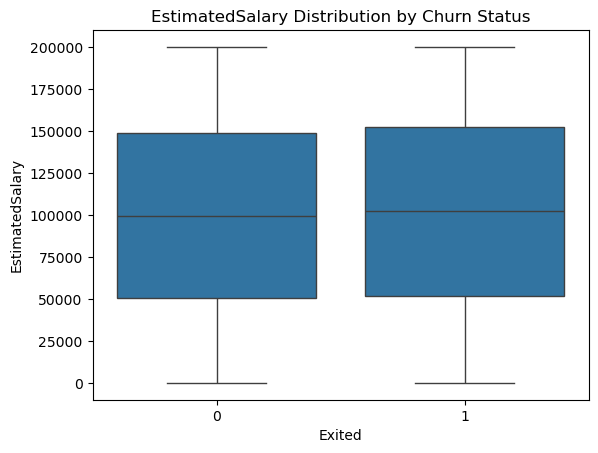

In [114]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('EstimatedSalary Distribution by Churn Status')
plt.show()


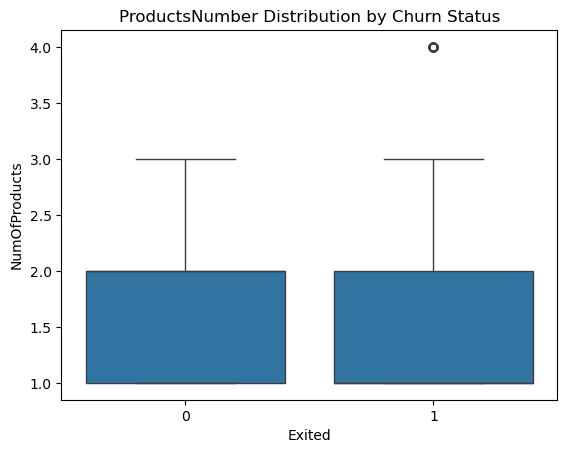

In [115]:
sns.boxplot(x='Exited', y='NumOfProducts', data=df)
plt.title('ProductsNumber Distribution by Churn Status')
plt.show()

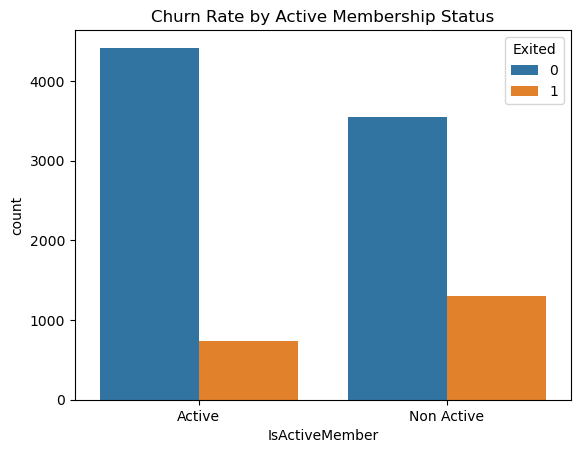

In [116]:
sns.countplot(x=df['IsActiveMember'].map({1: 'Active', 0: 'Non Active'}), hue='Exited', data=df)
plt.title('Churn Rate by Active Membership Status')
plt.show()


<div dir="rtl" style="font-family: Tahoma; font-size: 15px; line-height: 1.8;">

- بیشتر چرن بانک از مشتریان غیرفعال هستن و فیچر دارای اهمیت محسوب می شود.
</div>

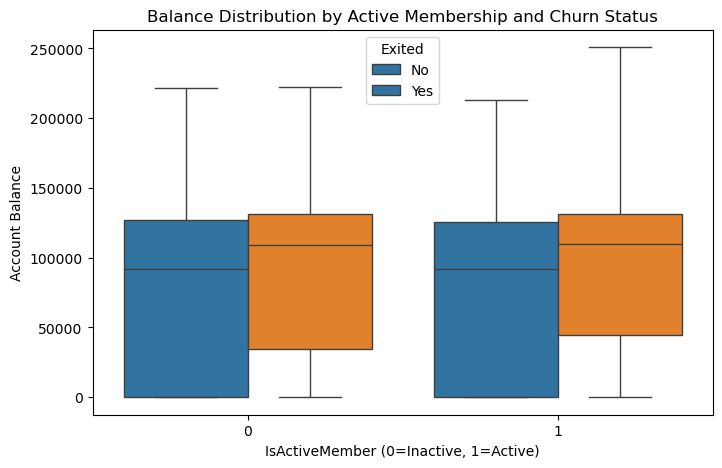

In [117]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='IsActiveMember', y='Balance', hue='Exited', data=df)
plt.title('Balance Distribution by Active Membership and Churn Status')
plt.xlabel('IsActiveMember (0=Inactive, 1=Active)')
plt.ylabel('Account Balance')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()


# Data Preprocessing

In [118]:
df_pre = df.copy()
df_pre.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df_pre = pd.get_dummies(df_pre, columns=['Geography','Gender'], drop_first=False)
df_pre.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_salary_ratio,credit_score_per_age,tenure_per_age,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,14.395349,0.046512,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744670,14.476190,0.023810,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401362,11.674419,0.186047,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,17.475000,0.025000,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587035,19.318182,0.045455,False,False,True,True,False


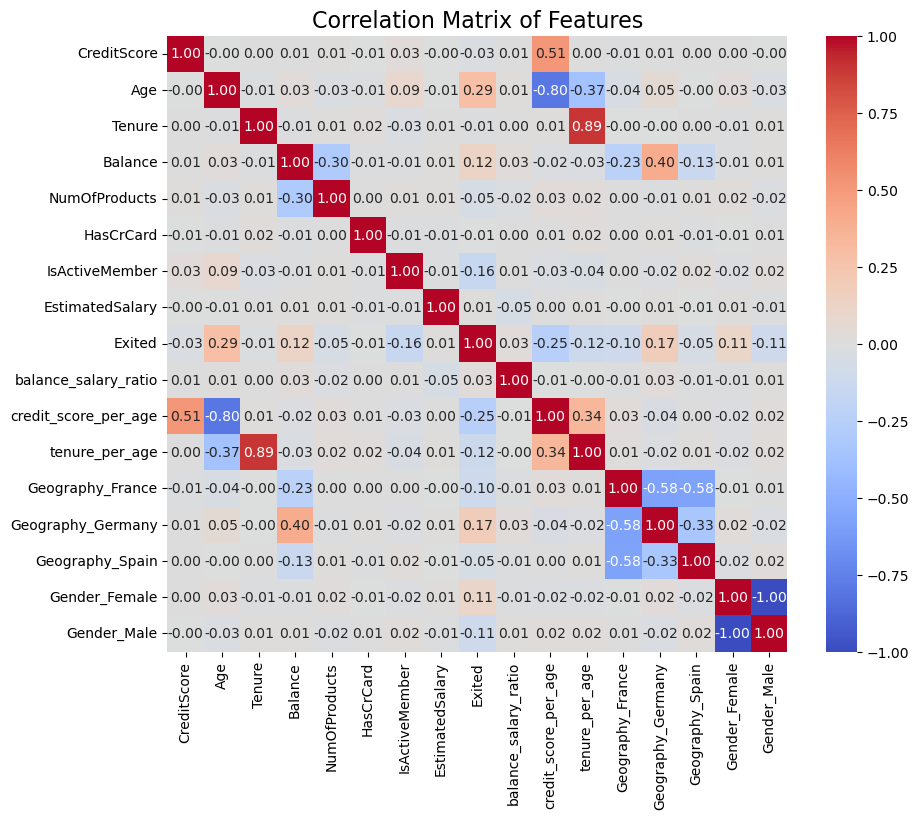

In [119]:
# بررسی همبستگی بین ویژگی‌ها
plt.figure(figsize=(10, 8))
correlation_matrix = df_pre.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

<div dir="rtl" style="font-family: Tahoma; font-size: 15px; line-height: 1.8;">

- با بررسی ماتریس همبستگی تمام تحلیل هایی که تا اینجا داشتیم تایید می شود
- تنها کار باقی مانده متوازن کردن دیتاهاست که با شبیه سازی داده های گروه کمتر اور سمپلینگ را انجام می دهیم.
</div>

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X = df_pre.drop('Exited', axis=1)
Y = df_pre['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) # stratify=Y baraye inke dar train va test tedad y ha (0 va 1) be ham nazdik bashe

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# مدل های درختی مثل رندوم فارست به اسکیل کردن نیازی ندارد و صرفا برای اور سمپلینگ چون براساس فاصله انجام می شود باید اسکیل شود

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train) # resample kardan baraye balance kardan data


In [123]:
X_train_res.shape, y_train_res.shape

((12740, 16), (12740,))

# Model Training

### Random Forest


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred = rf_model.predict(X_test_scaled)

print('--- Evaluation RF model ---')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')

--- Evaluation RF model ---
[[1435  158]
 [ 162  245]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.60      0.60       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

Accuracy: 0.8400
F1 Score: 0.6049


In [122]:
# model tuning
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500, 800, 1000],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
rf_model = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train_res, y_train_res)
print(f'Best Parameters: {rf_random_search.best_params_}')
best_rf_model = rf_random_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test_scaled)
print('--- Evaluation Tuned RF model ---')
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))
print(f'Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_tuned):.4f}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
--- Evaluation Tuned RF model ---
[[1435  158]
 [ 161  246]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.60      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

Accuracy: 0.8405
F1 Score: 0.6067


### XGBoost

In [136]:
xg_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xg_model.fit(X_train_res, y_train_res)
y_pred = xg_model.predict(X_test_scaled)
print('--- Evaluation XGBoost model ---')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')

--- Evaluation XGBoost model ---
[[1472  121]
 [ 182  225]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1593
           1       0.65      0.55      0.60       407

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000

Accuracy: 0.8485
F1 Score: 0.5976


g:\anaconda3_2024\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:40:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [138]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xg_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xg_random_search = RandomizedSearchCV(estimator=xg_model, param_distributions=param_grid_xgb, n_iter=100, cv=3, verbose=2, random_state=4, n_jobs=-1)
xg_random_search.fit(X_train_res, y_train_res)
print(f'Best Parameters: {xg_random_search.best_params_}')
best_xg_model = xg_random_search.best_estimator_
y_pred_tuned = best_xg_model.predict(X_test_scaled)
print('--- Evaluation Tuned XGBoost model ---')
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))
print(f'Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_tuned):.4f}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits


g:\anaconda3_2024\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:43:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
--- Evaluation Tuned XGBoost model ---
[[1474  119]
 [ 190  217]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.65      0.53      0.58       407

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Accuracy: 0.8455
F1 Score: 0.5841


### LightGBM

In [129]:
light_model = lgb.LGBMClassifier(random_state=42)
light_model.fit(X_train_res, y_train_res)
y_pred = light_model.predict(X_test_scaled)
print('--- Evaluation LightGBM model ---')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')

[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2674
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
--- Evaluation LightGBM model ---
[[1499   94]
 [ 178  229]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1593
           1       0.71      0.56      0.63       407

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.86      0.86      0.86      2000

Accuracy: 0.8640
F1 Score: 0.6274


In [ ]:
# بهینه سازی هایپر پارامتر ها
param_grid_lgbm = {
    'n_estimators': [200, 500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 10, 20],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]
}
lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_random_search = RandomizedSearchCV(estimator=lgbm_model, param_distributions=param_grid_lgbm, n_iter=300, cv=3, verbose=2, random_state=42, n_jobs=-1)
lgbm_random_search.fit(X_train_res, y_train_res)
print(f'Best Parameters: {lgbm_random_search.best_params_}')
best_lgbm_model = lgbm_random_search.best_estimator_


Fitting 3 folds for each of 300 candidates, totalling 900 fits


g:\anaconda3_2024\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2674
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [133]:
y_pred_tuned = best_lgbm_model.predict(X_test_scaled)
print('--- Evaluation Tuned LightGBM model ---')
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))
print(f'Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_tuned):.4f}')

--- Evaluation Tuned LightGBM model ---
[[1490  103]
 [ 185  222]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.68      0.55      0.61       407

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy: 0.8560
F1 Score: 0.6066


<div dir="rtl" style="font-family: Tahoma; font-size: 15px; line-height: 1.8;">

- با 300 دور ترکیب هایپرپایامتر ها باز هم نتیجه بهتر نشد که نشون میده تنظیمات دیفالت خود مدل LightGBM بهترین حالت را به ما می دهد .
- نتیجه نهایی : Accuracy: 0.8640
F1 Score: 0.6274
</div>

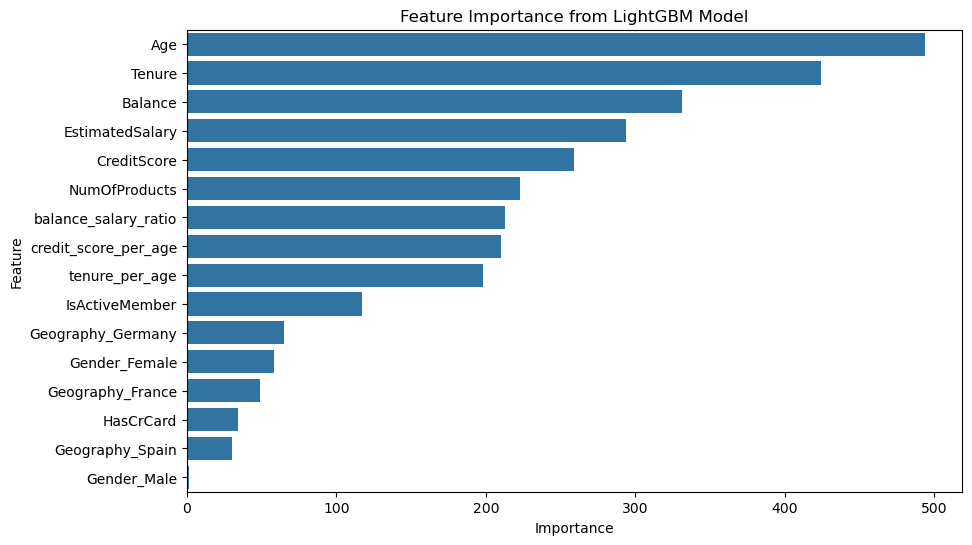

In [134]:
# Feature importance
importances = light_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from LightGBM Model')
plt.show()

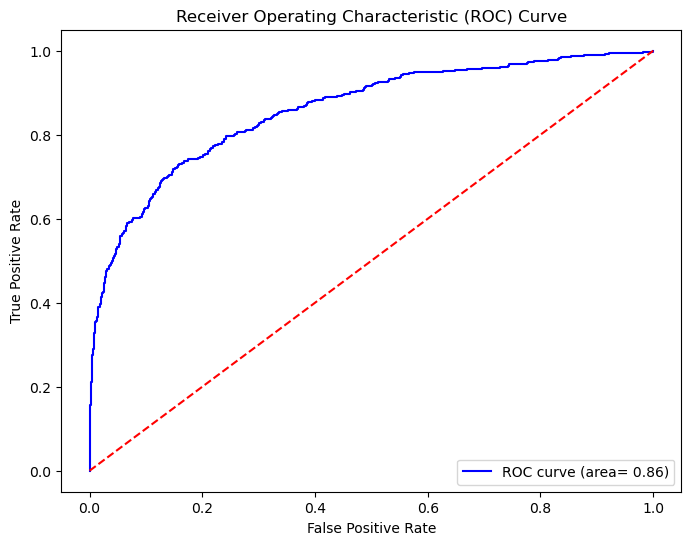

In [135]:
# ROC AUC Curve
from sklearn.metrics import roc_curve, auc
y_prob = light_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area= {roc_auc:.2f})')  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
